Files found: ['C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\0 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\1 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\12 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\18 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\24 houres.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\3 hours .jpg']
time=0 hr   Scratch area=11573 pix²
time=1 hr   Scratch area=11644 pix²
time=2 hr   Scratch area=8599 pix²
time=3 hr   Scratch area=7723 pix²
time=4 hr   Scratch area=6805 pix²


C:\Users\Nadeem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


time=5 hr   Scratch area=10926 pix²
Time List: [0, 1, 2, 3, 4, 5]
Area List: [11573, 11644, 8599, 7723, 6805, 10926]
y = -532.23x + 10875.57
R² = 0.2238


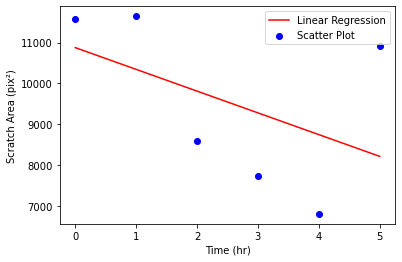

In [4]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

path = "C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\*.*"

files = glob.glob(path)
print("Files found:", files)

for file in files:
    img = io.imread(file)
    
    # Convert the image to grayscale
    img_gray = color.rgb2gray(img)
    
    entropy_img = entropy(img_gray, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print(f"time={time} hr   Scratch area={scratch_area} pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

# Print the values for verification
print("Time List:", time_list)
print("Area List:", area_list)

# Plotting the scatter plot
plt.scatter(time_list, area_list, c='blue', label='Scatter Plot')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
line = slope * np.array(time_list) + intercept
plt.plot(time_list, line, c='red', label='Linear Regression')

plt.xlabel('Time (hr)')
plt.ylabel('Scratch Area (pix²)')
plt.legend()

# Format and print the linear regression equation and R-squared value
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = f"R² = {r_value**2:.4f}"
print(equation)
print(r_squared)

plt.show()



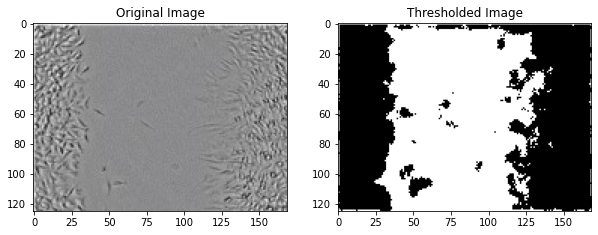

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')

plt.show()

Files found: ['C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\0 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\1 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\12 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\18 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\24 houres.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\3 hours .jpg']
time= 0 hr   Scratch area= 11573 pix²
time= 1

C:\Users\Nadeem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


 hr   Scratch area= 11644 pix²
time= 2 hr   Scratch area= 8599 pix²
time= 3 hr   Scratch area= 7723 pix²
time= 4 hr   Scratch area= 6805 pix²
time= 5 hr   Scratch area= 10926 pix²


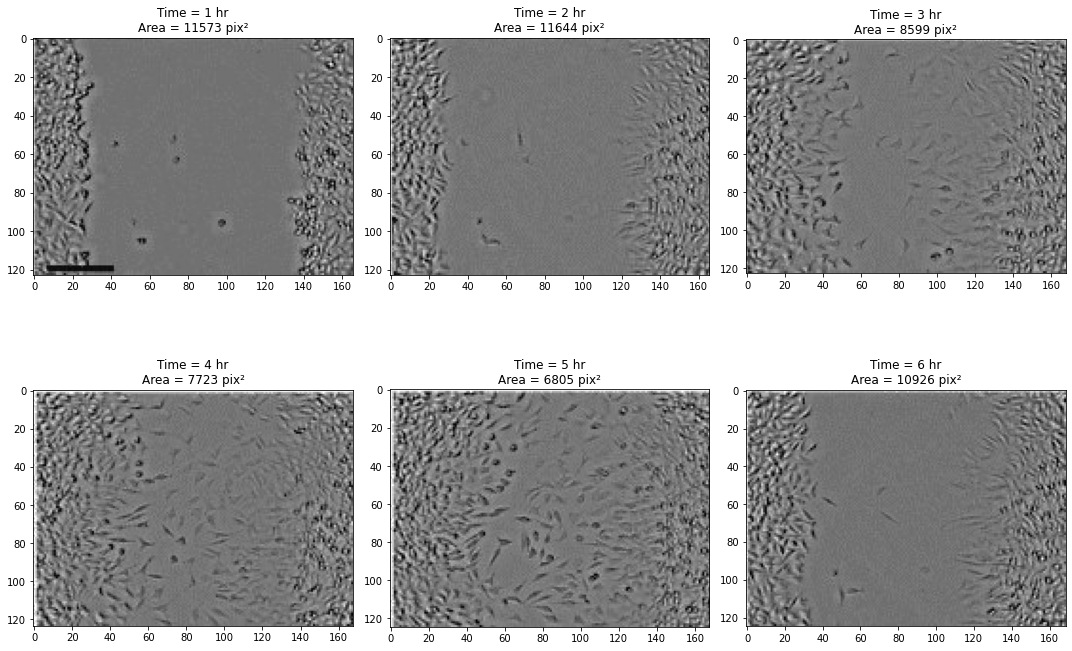

y =  -532.2285714285714 x  +  10875.571428571428
R² =  0.223821067393144


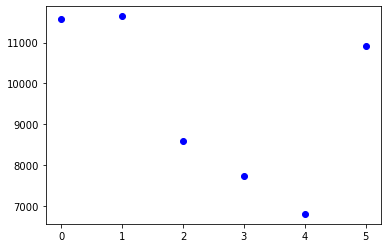

In [9]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

path = "C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\*.*"

files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, file in enumerate(files):
    img = io.imread(file)
    
    # Convert the image to grayscale
    img_gray = color.rgb2gray(img)
    
    entropy_img = entropy(img_gray, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    row_idx = idx // num_cols
    col_idx = idx % num_cols

    axes[row_idx, col_idx].imshow(img_gray, cmap='gray')
    axes[row_idx, col_idx].set_title(f'Time = {time} hr\nArea = {scratch_area} pix²')

# Remove empty subplots, if any
for idx in range(num_images, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)



Files found: ['C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\0 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\1 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\12 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\18 hours.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\24 houres.jpg', 'C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\3 hours .jpg']
time= 0 hr   Scratch area= 11573 pix²
time= 1 hr   Scratch area= 11644 pix²
time= 2 hr   Scratch area= 8599 pix²
time= 3 hr   Scratch area= 7723 pix²
time= 4 hr   Scratch area= 6805 pix²
time= 5 hr   Scratch area= 10926 pix²


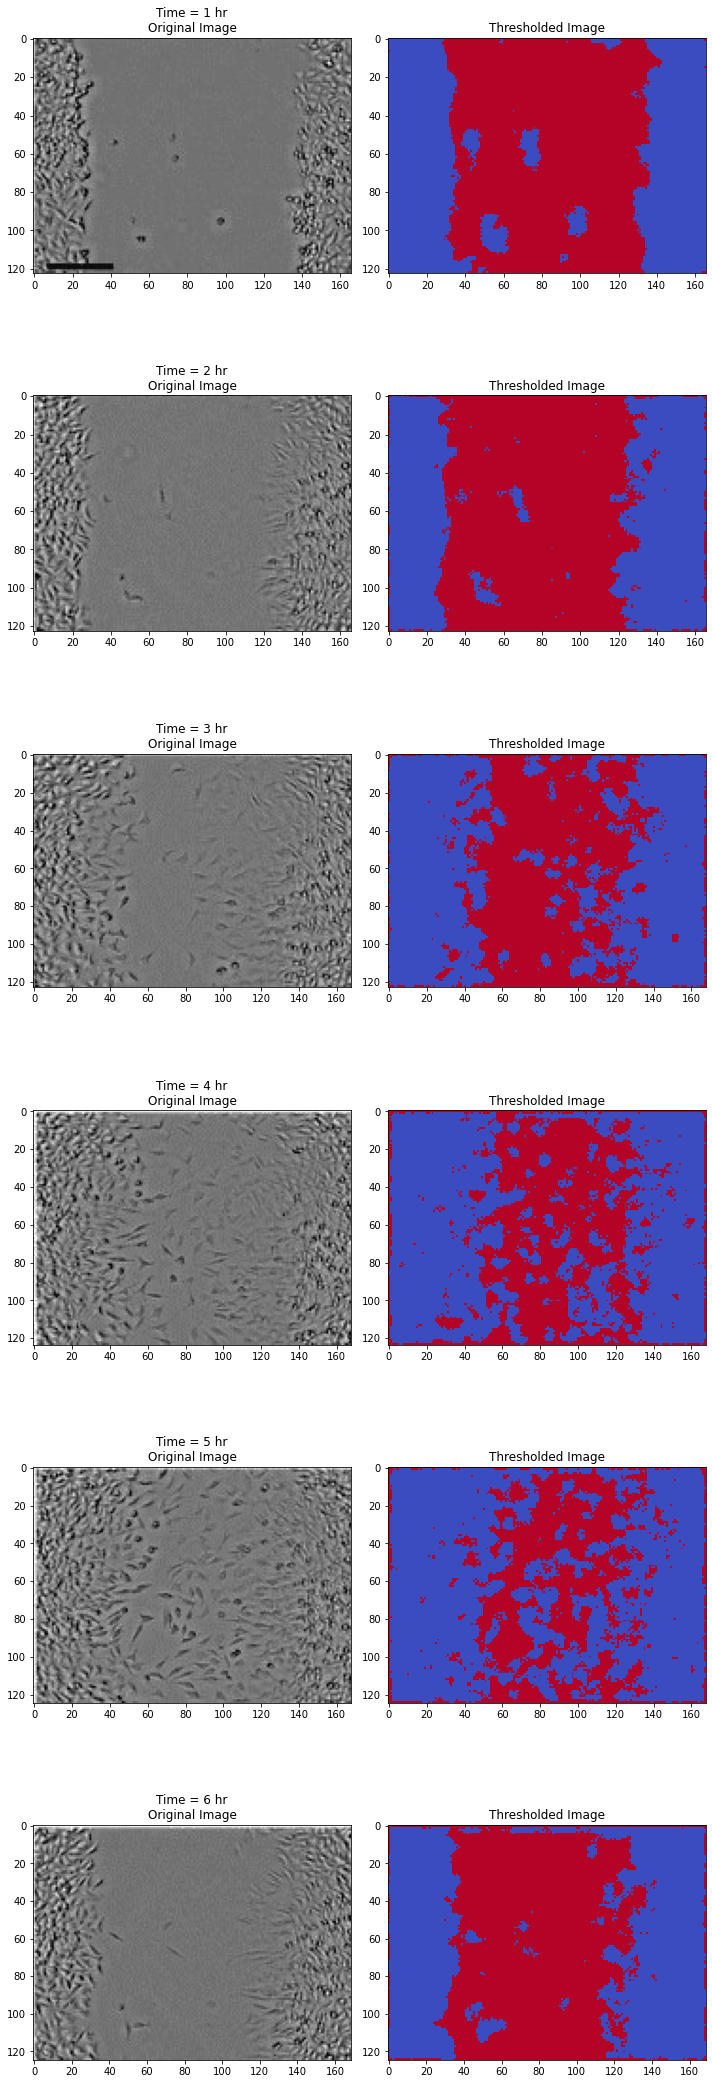

y =  -532.2285714285714 x  +  10875.571428571428
R² =  0.223821067393144
Image shape after conversion to grayscale: (125, 169)


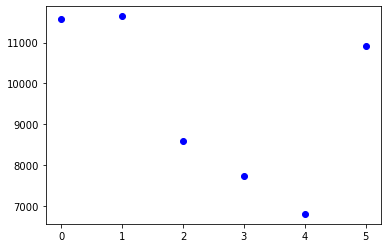

In [15]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

path ="C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\Labs Workload\\Lab#4\\*.*"

files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

for idx, file in enumerate(files):
    img = io.imread(file)

    # Convert to grayscale
    if img.ndim == 3:  # Check if image is 3D (RGB)
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    entropy_img = entropy(img_gray, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    axes[idx, 0].imshow(img_gray, cmap='gray')
    axes[idx, 0].set_title(f'Time = {time} hr\nOriginal Image')

    axes[idx, 1].imshow(binary, cmap='coolwarm', interpolation='none')
    axes[idx, 1].set_title('Thresholded Image')

plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)

# Add this line to print image shape after conversion to grayscale
print("Image shape after conversion to grayscale:", img_gray.shape)